# Tuorial 5, Question 1

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import numpy as np
import pylab as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_epochs = 2500
no_exps = 10
batch_size = 70
hidden_units = [2, 4, 6, 8, 10]

In [3]:
seed = 10
tf.random.set_seed(seed)
np.random.seed(seed)

np.set_printoptions(precision=4)

In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
  ]

In [5]:
# perform experiments
def train_exp(X, Y):

    x_train, y_train, x_test, y_test = X[:70], Y[:70], X[70:], Y[70:]
    
    err = []
    for no_hidden in hidden_units:

        model = Sequential([
                    Dense(no_hidden, activation='sigmoid'),
                    Dense(1, activation='sigmoid')])
    
        model.compile(optimizer = SGD(learning_rate = 0.05), 
                                    loss='mse')
    
        history = model.fit(x_train, y_train,
                            epochs=no_epochs,
                            verbose=0,
                            callbacks= [get_callbacks()],
                            use_multiprocessing=False,
                            batch_size = batch_size,
                            validation_data=(x_test, y_test))
        
        err.append(min(history.history['val_loss']))
    
    return err

In [6]:
# generate training data
X = np.zeros((10*10, 2))
no_data = 0
for i in np.arange(-1.0, 1.001, 2.0/9.0):
    for j in np.arange(-1.0, 1.001, 2.0/9.0):
        X[no_data] = [i, j]
        no_data += 1
Y = np.zeros((no_data, 1))
Y[:,0] = np.sin(np.pi*X[:,0])*np.cos(2*np.pi*X[:,1])

In [7]:
idx = np.arange(no_data)

# perform experiments
err = []
print('hidden units: {}'.format(hidden_units))
for exp in range(no_exps):
 
    np.random.shuffle(idx)
    err.append(train_exp(X[idx], Y[idx]))
    print('exp: {}, errors: {}'.format(exp, np.array(err[exp])))

hidden units: [2, 4, 6, 8, 10]
exp: 0, errors: [0.3186 0.318  0.313  0.3151 0.3169]
exp: 1, errors: [0.1827 0.1811 0.1848 0.1807 0.182 ]
exp: 2, errors: [0.2476 0.2447 0.245  0.2453 0.2441]
exp: 3, errors: [0.2177 0.2194 0.2183 0.2196 0.2187]
exp: 4, errors: [0.256  0.2508 0.2533 0.2477 0.2513]
exp: 5, errors: [0.251  0.252  0.2413 0.2406 0.2441]
exp: 6, errors: [0.2273 0.2264 0.2254 0.2257 0.2244]
exp: 7, errors: [0.195  0.1899 0.1955 0.1935 0.1878]
exp: 8, errors: [0.2055 0.2022 0.204  0.2053 0.2002]
exp: 9, errors: [0.2291 0.2247 0.2321 0.2302 0.2325]


In [8]:
# print the mean errors of different models
mean_err = np.mean(np.array(err), axis = 0)
print('mean errors: {}'.format(mean_err))
print(' *hidden units* %d '%hidden_units[np.argmin(mean_err)])

mean errors: [0.2331 0.2309 0.2313 0.2304 0.2302]
 *hidden units* 10 


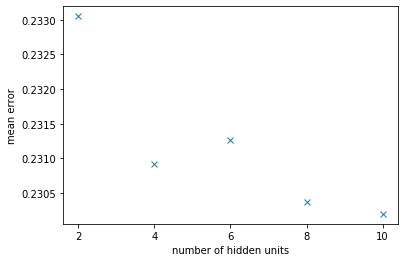

In [9]:
plt.figure(1)
plt.plot(hidden_units, mean_err, marker = 'x', linestyle = 'None')
plt.xticks(hidden_units)
plt.xlabel('number of hidden units')
plt.ylabel('mean error')
plt.savefig('./figures/t5q1_1.png')